In [1]:
import pandas as pd
from collections import Counter
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [142]:
plt.rcParams.update({'font.size': 15})

In [3]:
metadata = pd.read_csv('~/data/metadata.txt', sep='\t', index_col=0)
metadata.head()

,age,race,sex,cmv,hla
sample_id,,,,,
HIP08653,52.0,"caucasian,non-hispanic or latino",female,+,"A*01,A*02,B*07,B*08"
HIP13276,53.0,"caucasian,non-hispanic or latino",male,-,"A*01,A*02,B*07,B*08"
HIP14114,57.0,"caucasian,non-hispanic or latino",female,-,"A*01,A*02,B*07,B*15"
HIP03370,41.0,"caucasian,non-hispanic or latino",male,+,"A*01,A*02,B*07,B*52"
HIP13015,39.0,"caucasian,non-hispanic or latino",male,-,"A*01,A*02,B*07,B*57"


In [40]:
files_all = os.listdir('../../data/cmv')
# files_all = os.listdir('../../data/cmv_VDJtools_format_tmp')

samples_0 = [f[:8] for f in files_all if f[:3] == 'HIP'] 
samples = [s for s in samples_0 if metadata.loc[s, 'cmv'] == '+' or metadata.loc[s, 'cmv'] == '-']
len(samples)

641

In [22]:
i = 0

for test_s in samples:
    
    all_cdr3s = pd.read_csv('~/data/cmv_VDJtools_format_reads/{}.tsv'.format(test_s), sep='\t')
    
    metadata.loc[test_s, 'sum_count'] = all_cdr3s['count'].sum()
    metadata.loc[test_s, 'sum_count_1000'] = all_cdr3s.nlargest(1000, 'count')['count'].sum()
    metadata.loc[test_s, 'freq_1000'] = metadata.loc[test_s, 'sum_count_1000'] / metadata.loc[test_s, 'sum_count']
    metadata.loc[test_s, 'sum_count_10000'] = all_cdr3s.nlargest(10000, 'count')['count'].sum()
    metadata.loc[test_s, 'freq_10000'] = metadata.loc[test_s, 'sum_count_10000'] / metadata.loc[test_s, 'sum_count']
    metadata.loc[test_s, 'unique_TCR'] = len(all_cdr3s)
    
    try:
        found_cdr3s = pd.read_csv('~/data/database_with_cmv/res/{}.{}.txt'.format(test_s, test_s), sep='\t')
        found_cdr3s = found_cdr3s.drop_duplicates(subset=['count', 'freq', 'cdr3nt', 'cdr3aa', 'v', 'd', 'j'])
        
        metadata.loc[test_s, 'CMV_unique'] = len(found_cdr3s)
        metadata.loc[test_s, 'CMV_count'] = found_cdr3s['count'].sum()
        
    except FileNotFoundError:
        metadata.loc[test_s, 'CMV_unique'] = 0
        metadata.loc[test_s, 'CMV_count'] = 0
    
    i += 1
    if i % 10 == 0:
        print(i, end=' ')

10 20 30 40 50 60 70 

In [7]:
metadata.head()

,age,race,sex,cmv,hla,sum_count,sum_count_1000,freq_1000,sum_count_10000,freq_10000,unique_TCR,CMV_unique,CMV_count
sample_id,,,,,,,,,,,,,
HIP08653,52.0,"caucasian,non-hispanic or latino",female,+,"A*01,A*02,B*07,B*08",442086.0,60699.0,0.137301,111230.0,0.251603,274757.0,935.0,1990.0
HIP13276,53.0,"caucasian,non-hispanic or latino",male,-,"A*01,A*02,B*07,B*08",0.0,0.0,NaN,0.0,NaN,198415.0,0.0,0.0
HIP14114,57.0,"caucasian,non-hispanic or latino",female,-,"A*01,A*02,B*07,B*15",165447.0,39560.0,0.239110,69647.0,0.420963,91166.0,318.0,475.0
HIP03370,41.0,"caucasian,non-hispanic or latino",male,+,"A*01,A*02,B*07,B*52",453024.0,65670.0,0.144959,100294.0,0.221388,314166.0,1181.0,2077.0
HIP13015,39.0,"caucasian,non-hispanic or latino",male,-,"A*01,A*02,B*07,B*57",460832.0,33927.0,0.073621,68521.0,0.148690,347050.0,1265.0,1716.0


In [51]:
meta_s = metadata.loc[samples]
meta_s['col'] = np.where(meta_s['cmv'] == '+', 'red', 'blue')
meta_s.head()

,age,race,sex,cmv,hla,sum_count,sum_count_1000,freq_1000,sum_count_10000,freq_10000,unique_TCR,CMV_unique,CMV_count,col
sample_id,,,,,,,,,,,,,,
HIP13396,56.0,"caucasian,non-hispanic or latino",female,+,"A*01,A*02,B*57,B*73",450629.0,36881.0,0.081843,68356.0,0.151690,344898.0,1059.0,1319.0,red
HIP12165,17.0,non-hispanic or latino,male,+,"A*02,A*24,B*27,B*35",114984.0,9122.0,0.079333,27936.0,0.242956,91165.0,342.0,438.0,red
HIP02103,10.0,"caucasian,non-hispanic or latino",male,-,"A*11,A*31,B*07,B*07",397599.0,13727.0,0.034525,44697.0,0.112417,323188.0,1082.0,1461.0,blue
HIP10480,11.0,NaN,female,+,"A*03,A*03,B*50,B*55",380693.0,45131.0,0.118550,76442.0,0.200797,283274.0,1082.0,1356.0,red
HIP04605,56.0,"caucasian,non-hispanic or latino",male,+,"A*01,A*26,B*08,B*22",360497.0,46350.0,0.128572,83226.0,0.230865,248702.0,774.0,1049.0,red


In [52]:
len(meta_s)

641

In [53]:
meta_s = meta_s.drop(['HIP13515'])
len(meta_s)

640

Text(0.5, 1.0, 'From VDJdb')

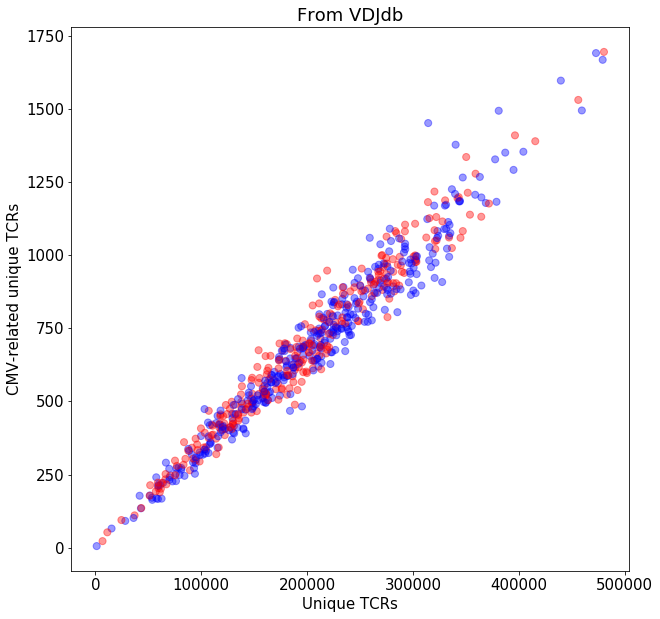

In [235]:
plt.figure(figsize=(10, 10))
plt.scatter(meta_s['unique_TCR'], meta_s['CMV_unique'], 
            c=meta_s['col'], 
            alpha=0.4, s=50)
plt.xlabel('Unique TCRs')
plt.ylabel('CMV-related unique TCRs')
plt.title('From VDJdb')

Text(0.5, 1.0, 'Freqs TCRs')

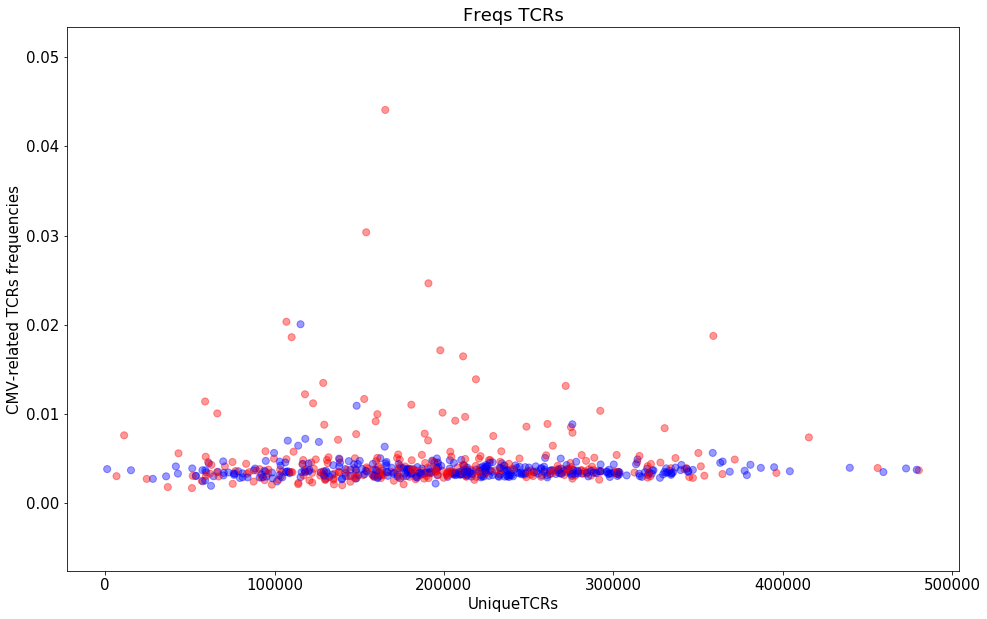

In [67]:
plt.figure(figsize=(16, 10))
plt.scatter(meta_s['unique_TCR'], meta_s['CMV_count'] / meta_s['sum_count'], 
            c=meta_s['col'], 
            alpha=0.4, s=50)
plt.xlabel('UniqueTCRs')
plt.ylabel('CMV-related TCRs frequencies')
plt.title('Freqs TCRs')

Text(0.5, 1.0, 'Log Freqs TCRs')

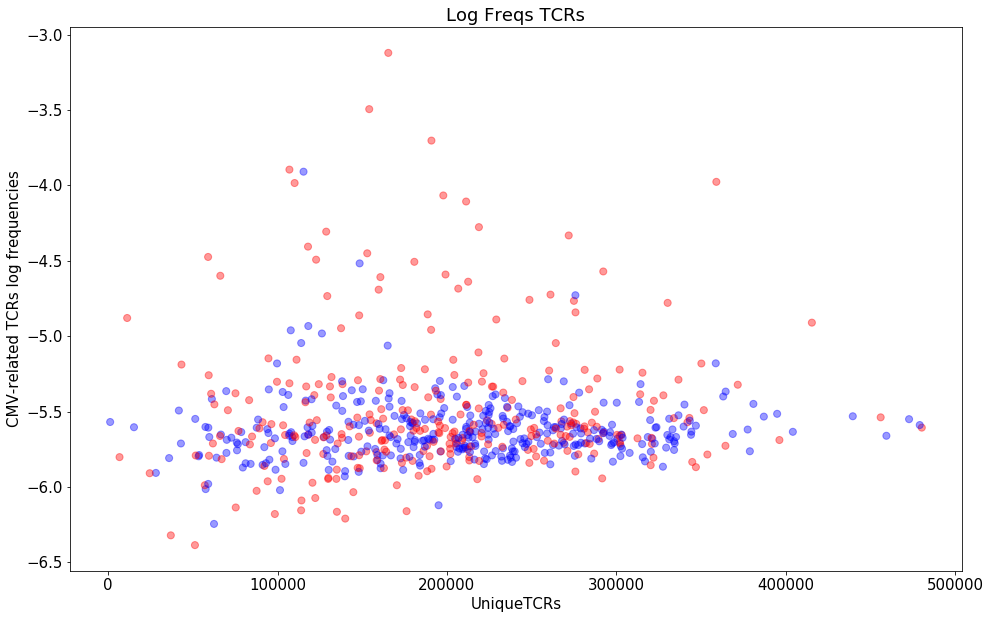

In [68]:
plt.figure(figsize=(16, 10))
plt.scatter(meta_s['unique_TCR'], np.log(meta_s['CMV_count'] / meta_s['sum_count']), 
            c=meta_s['col'], 
            alpha=0.4, s=50)
plt.xlabel('UniqueTCRs')
plt.ylabel('CMV-related TCRs log frequencies')
plt.title('Log Freqs TCRs')

In [74]:
Counter(meta_s['hla']).most_common(10)

[(nan, 40),
 ('A*01,A*02,B*08,B*51', 6),
 ('A*01,A*02,B*08,B*44', 6),
 ('A*02,A*03,B*07,B*27', 5),
 ('A*01,A*03,B*07,B*08', 4),
 ('A*01,A*01,B*08,B*08', 4),
 ('A*01,A*02,B*08,B*27', 4),
 ('A*01,A*03,B*08,B*35', 4),
 ('A*01,A*02,B*08,B*62', 4),
 ('A*01,A*24,B*08,B*44', 3)]

In [105]:
Counter(meta_s['hla'].str.split(',', expand=True)[0]).most_common(10)

[('A*02', 229),
 ('A*01', 179),
 ('A*03', 76),
 ('A*24', 45),
 (nan, 40),
 ('A*11', 28),
 ('A*23', 11),
 ('A*26', 9),
 ('A*29', 8),
 ('A*32', 4)]

In [107]:
hlas = meta_s['hla'].str.split(',', expand=True)
hla_A02 = hlas[(hlas[0] == 'A*02') | (hlas[1] == 'A*02')].index

Text(0.5, 1.0, 'Log Freqs TCRs')

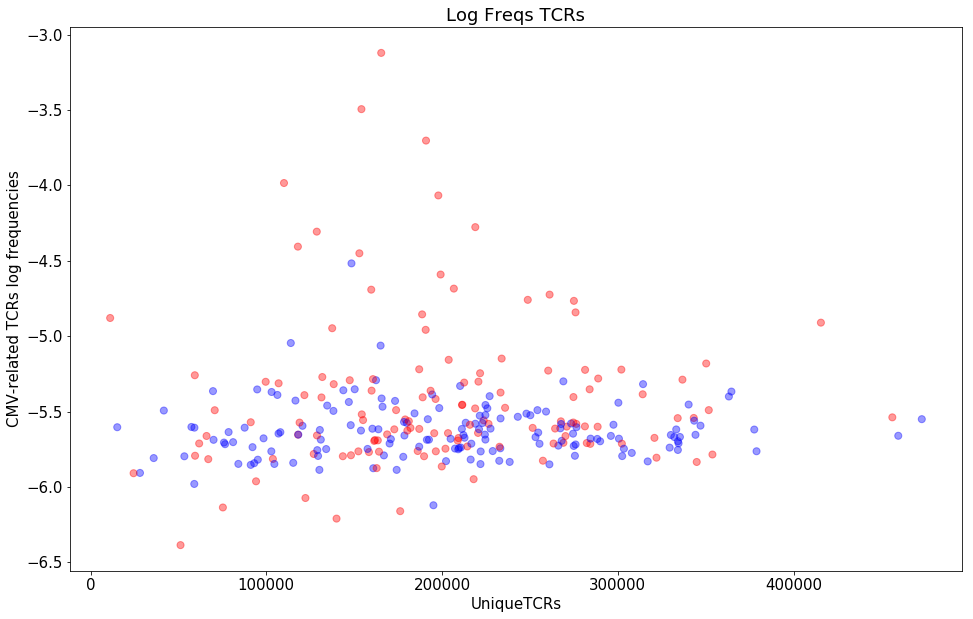

In [109]:
plt.figure(figsize=(16, 10))
plt.scatter(meta_s.loc[hla_A02, 'unique_TCR'], np.log(meta_s.loc[hla_A02, 'CMV_count'] / meta_s.loc[hla_A02, 'sum_count']), 
            c=meta_s.loc[hla_A02, 'col'], 
            alpha=0.4, s=50)
plt.xlabel('UniqueTCRs')
plt.ylabel('CMV-related TCRs log frequencies')
plt.title('Log Freqs TCRs')

In [118]:
article_cmv = pd.read_csv('~/CMV_project/aryuna/cmv_assotiated_164.csv')
article_cmv.head()

,V gene,CDR3,J gene,Incidence in CMV+ subjects,Incidence in CMV- subjects,P-value,HLA restriction
0,TCRBV09-01,CASSGQGAYEQYF,TCRBJ02-07*01,61,11,2.160000e-13,NaN
1,TCRBV19-01,CASSIGPLEHNEQFF,TCRBJ02-01*01,30,0,1.750000e-11,A1
2,TCRBV05-01*01,CASSPDRVGQETQYF,TCRBJ02-05*01,33,1,2.660000e-11,NaN
3,TCRBV07-02*01,CASSLEAEYEQYF,TCRBJ02-07*01,30,1,3.200000e-10,B8
4,TCRBV28-01*01,CASSIEGNQPQHF,TCRBJ01-05*01,26,0,5.310000e-10,NaN


In [161]:
article_cmv['V_truncated'] = article_cmv['V gene'].str.split('*', expand=True)[0].str[3:]
article_cmv['J_truncated'] = article_cmv['J gene'].str.split('*', expand=True)[0].str[3:]
article_cmv.head()

,V gene,CDR3,J gene,Incidence in CMV+ subjects,Incidence in CMV- subjects,P-value,HLA restriction,V_truncated,J_truncated
0,TCRBV09-01,CASSGQGAYEQYF,TCRBJ02-07*01,61,11,2.160000e-13,NaN,BV09-01,BJ02-07
1,TCRBV19-01,CASSIGPLEHNEQFF,TCRBJ02-01*01,30,0,1.750000e-11,A1,BV19-01,BJ02-01
2,TCRBV05-01*01,CASSPDRVGQETQYF,TCRBJ02-05*01,33,1,2.660000e-11,NaN,BV05-01,BJ02-05
3,TCRBV07-02*01,CASSLEAEYEQYF,TCRBJ02-07*01,30,1,3.200000e-10,B8,BV07-02,BJ02-07
4,TCRBV28-01*01,CASSIEGNQPQHF,TCRBJ01-05*01,26,0,5.310000e-10,NaN,BV28-01,BJ01-05


In [225]:
samples.remove('HIP13515')

ValueError: list.remove(x): x not in list

In [226]:
i = 0

for test_s in samples:
    
    all_cdr3s = pd.read_csv('~/data/cmv_VDJtools_format_reads/{}.tsv'.format(test_s), sep='\t')
    
    cur_hla = set()
    # print(test_s)
    if pd.isnull(meta_s.loc[test_s, 'hla']):
        continue    
    for h in meta_s.loc[test_s, 'hla'].split(','):
        h = h.split('*')
        h[1] = str(int(h[1]))
        h = ''.join(h)
        cur_hla.add(h)
    cur_hla = list(cur_hla)
    hla_restric = ~(pd.isnull(article_cmv['HLA restriction']))
    non_hla_restric = ~hla_restric
    good_hla = article_cmv.loc[hla_restric, 'HLA restriction'].str.split(', ').apply(
        lambda x: sum([hla in x for hla in cur_hla]) > 0) 
    cur_article_cmv = pd.concat([article_cmv[non_hla_restric], article_cmv[hla_restric][good_hla]])
    
    
    meta_s.loc[test_s, 'article_cmv_unique_V3'] = len(
        all_cdr3s.loc[
            (all_cdr3s['CDR3aa'].isin(cur_article_cmv['CDR3'])) &
             (all_cdr3s['V'].isin(cur_article_cmv['V_truncated'])) &
              (all_cdr3s['J'].isin(cur_article_cmv['J_truncated']))])

    i += 1
    if i % 10 == 0:
        print(i, end=' ')

10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 

In [231]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='CMV+')
blue_patch = mpatches.Patch(color='blue', label='CMV-')

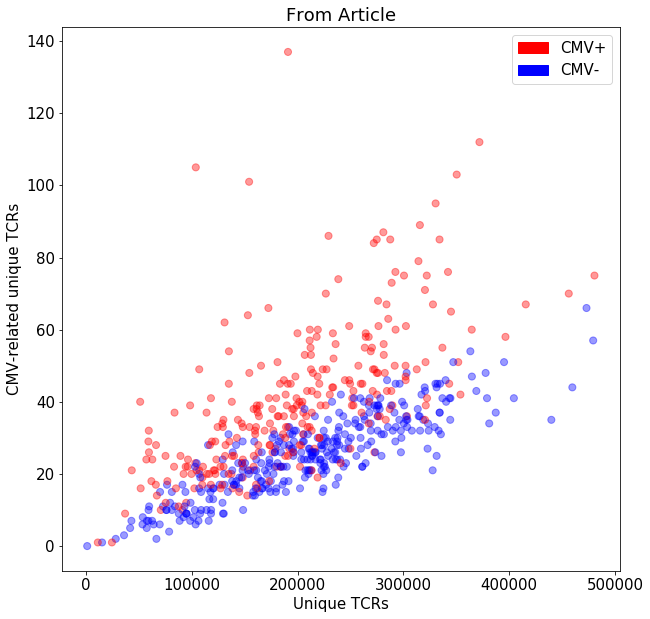

In [232]:
plt.figure(figsize=(10, 10))
plt.scatter(meta_s['unique_TCR'], meta_s['article_cmv_unique_V3'], 
            c=meta_s['col'], 
            alpha=0.4, s=50)
plt.xlabel('Unique TCRs')
plt.ylabel('CMV-related unique TCRs')
plt.title('From Article')
plt.legend(handles=[red_patch, blue_patch])

Text(0.5, 1.0, 'From Article')

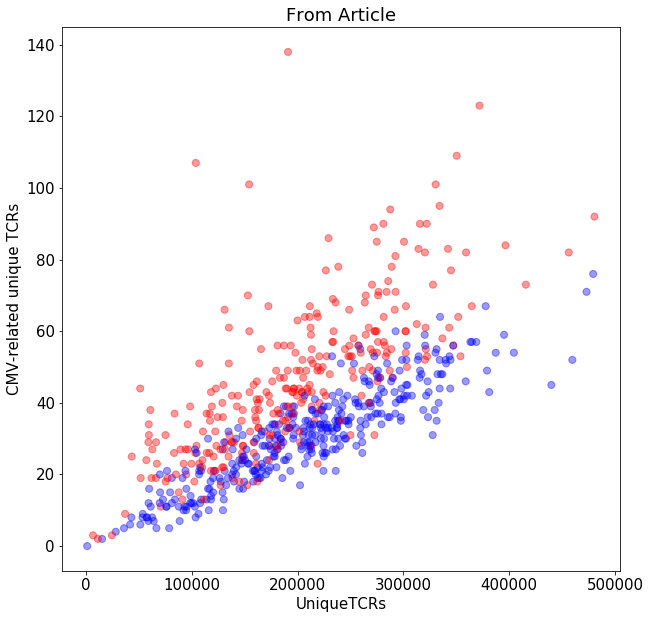

In [166]:
plt.figure(figsize=(10, 10))
plt.scatter(meta_s['unique_TCR'], meta_s['article_cmv_unique_V2'], 
            c=meta_s['col'], 
            alpha=0.4, s=50)
plt.xlabel('UniqueTCRs')
plt.ylabel('CMV-related unique TCRs')
plt.title('From Article')

Text(0.5, 1.0, 'From Article')

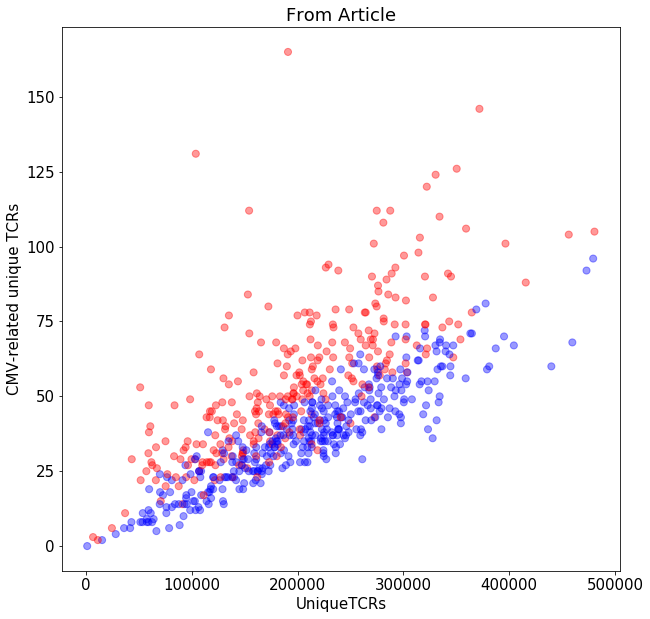

In [143]:
plt.figure(figsize=(10, 10))
plt.scatter(meta_s['unique_TCR'], meta_s['article_cmv_unique'], 
            c=meta_s['col'], 
            alpha=0.4, s=50)
plt.xlabel('UniqueTCRs')
plt.ylabel('CMV-related unique TCRs')
plt.title('From Article')

In [131]:
meta_s[(meta_s['col'] != 'red') & (meta_s['col'] != 'blue')]

,age,race,sex,cmv,hla,sum_count,sum_count_1000,freq_1000,sum_count_10000,freq_10000,unique_TCR,CMV_unique,CMV_count,col,article_cmv_unique
sample_id,,,,,,,,,,,,,,,
HIP13515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0


# На будущее

In [164]:
res = pd.merge(all_cdr3s, found_cdr3s, how='left', 
               left_on=['count', 'frequency', 'CDR3nt', 'CDR3aa', 'V', 'D', 'J'],
               right_on=['count', 'freq', 'cdr3nt', 'cdr3aa', 'v', 'd', 'j'], 
               suffixes=('_ALL', '_CMV'))
res.head()

,count,frequency,CDR3nt,CDR3aa,V,D,J,freq,cdr3nt,cdr3aa,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,NaN,NaN,GATGGATCCATCTCCACTCTGACGATCCAGCGCACAGAGCAGCGGG...,GASSFS,BV07-06,TRBD1,BJ02-07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,ACTCTGACAGTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACA...,CSAKDYTEAFF,BV20-01,TRBD1,BJ01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,ACTCTGACGATCCAGCGCACACAGCAGGAGGACTCGGCCGTGTATC...,CASSFYNEQFF,BV07-02,TRBD1,BJ02-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,ACTCTGAAGGTGCAGCCTGCAGAACTGGAGGATTCTGGAGTTTATT...,CASSQNNEQFF,BV14-01,TRBD1,BJ02-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,GAGGATTTCCCGCTCAGGCTGCTGTCGGCTGCTCCCTCCCAGACAT...,CANPELFF,BV06-05,TRBD1,BJ02-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
